In [1]:
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from helper_functions import plot_setup
sns.set_style('white')
plot_setup()

# Plotting the data

The first step of machine learning is understanding the data that you are working with. This helps you get a sense of which features might be the most important, which algorithms make the most sense for your data, etc.

Plot the data and see what initial insights you can get.

* Which features seem to separate the data?
* How do they separate the data?
* What do you think might distinguish the setosa species? the versicolor? the virginica?

In [2]:
# has 1300+ rows
data_url = 'https://raw.githubusercontent.com/marijavlajic/code-university-ml-workshop/master/titanic.csv'
titanic = pd.read_csv(data_url, sep = ';')

In [3]:
titanic.replace(',', '.', inplace = True, regex = True)

In [89]:
titanic.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [4]:
titanic[['age', 'fare']] = titanic[['age', 'fare']].apply(pd.to_numeric)

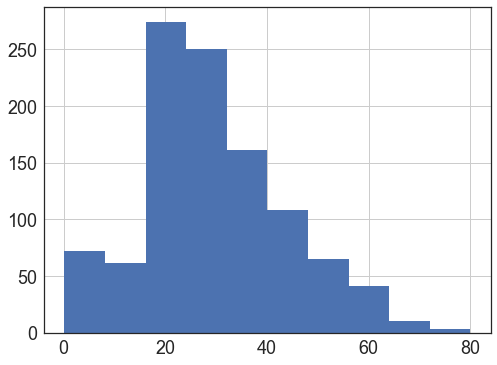

In [5]:
titanic['age'].hist()

/Users/marijavlajic/anaconda/envs/py3k/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


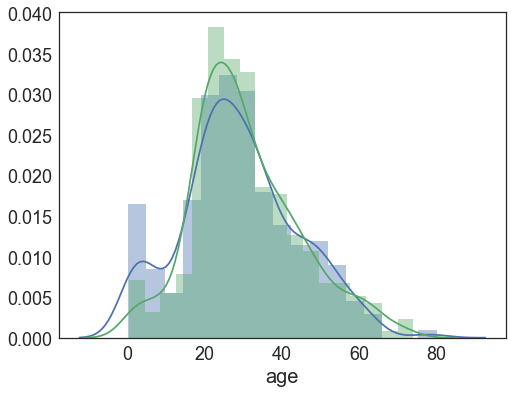

In [6]:
sns.distplot(titanic['age'][titanic['survived'] == 1].dropna())
sns.distplot(titanic['age'][titanic['survived'] == 0].dropna())

/Users/marijavlajic/anaconda/envs/py3k/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


(-20, 100)

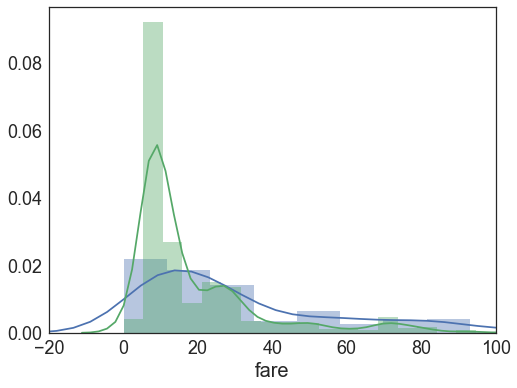

In [7]:
sns.distplot(titanic['fare'][titanic['survived'] == 1].dropna())
sns.distplot(titanic['fare'][titanic['survived'] == 0].dropna())
sns.plt.xlim(-20, 100)

# Loading and preparing the data

We are working with the [Iris Dataset](http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html). Using a dataset contained within scikit-learn allows us to skip a lot of the work we would have to do on a dataset in the wild.

Typical data sets are messy. They require preprocessing to get the data into a format which a library like scikit-learn can use. Data can be missing or invalid, you might have much more data available than you need, you may need to change your data types. With the iris data set, the pre-processing is done for you, but you can learn more about what preparing a data set [here](https://machinelearningmastery.com/how-to-prepare-data-for-machine-learning/).

In [5]:
iris_dataset = load_iris()

** Let's extract the features and the labels from the dataset**

Features are different measured characteristics of an item.<br />
A label is the classification of that item. 

We use the feature set and labels of our training data to learn patterns for classifying new unseen data.
The labels are a key differentiator of supervised learning.

In [6]:
X = iris_dataset.data ## features
y = iris_dataset.target ## labels

`X` is an array of features (_sepal_ and _petal_ _width_ and _length_).

In [7]:
iris_dataset.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

`y` is an array of labels. (_setosa_, _versicolor_, _virginica_). The labels in `y` are numerical (in this data set - 0,1,2). You can find the name of the associated feature by indexing into the `iris_dataset.target_names` array with the numerical label.

In [8]:
iris_dataset.target_names

array(['setosa', 'versicolor', 'virginica'], 
      dtype='<U10')

The dimensions of the feature array `X` are `[n_samples, n_features]`; labels `y` are an array of size `[n_samples]`. We can use [`shape`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.ndarray.shape.html) to see the dimension of an array.

In [9]:
X.shape, y.shape

((150, 4), (150,))

Next, we separate the dataset into a training and test set.

We split the dataset randomly into these two sets. With the test set, we ignore the labels, and use what we learn from the training set to predict the labels. Then we can compare against the labels we ignore and see how well our model performed.


You will see that in action later, but for now, we just show you the code to split the data set.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Here we assigned 40% of the dataset to the test set.

How many items from the dataset are in the training set? How many are in the test set?

For future thought: How do you think the size of the training set versus testing set could affect model performance?

In [11]:
X_train.shape, y_train.shape

((90, 4), (90,))

In [12]:
X_test.shape, y_test.shape

((60, 4), (60,))